# Neural Network in NumPy

This notebook uses the following implementations to build our neural network:

1. `layers/linear.py`
2. `layers/relu.py`
3. `layers/softmax.py`
4. `layers/loss_func.py`

We will be testing your 2 layer neural network implementation on a toy dataset.


In [1]:
# Setup

import matplotlib.pyplot as plt
import numpy as np

from layers.sequential import Sequential
from layers.linear import Linear
from layers.relu import ReLU
from layers.softmax import Softmax
from layers.loss_func import CrossEntropyLoss
from utils.optimizer import SGD

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

We will use the class Sequential as implemented in the file layers/sequential.py to build a layer by layer model of our neural network. Below we initialize the toy model and the toy random data that you will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3  # Output
num_inputs = 10  # N


def init_toy_model():
    np.random.seed(0)
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])


def init_toy_data():
    np.random.seed(0)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.random.randint(num_classes, size=num_inputs)
    # y = np.array([0, 1, 2, 2, 1])
    return X, y


net = init_toy_model()
X, y = init_toy_data()


### Forward Pass: Compute Scores 
Implement the forward functions in Linear, Relu and Softmax layers and get the output by passing our toy data X
The output must match the given output scores

In [3]:
scores = net.forward(X)
print("Scores:")
print(scores)


Scores:
[[0.33333514 0.33333826 0.33332661]
 [0.3333351  0.33333828 0.33332661]
 [0.3333351  0.33333828 0.33332662]
 [0.3333351  0.33333828 0.33332662]
 [0.33333509 0.33333829 0.33332662]
 [0.33333508 0.33333829 0.33332662]
 [0.33333511 0.33333828 0.33332661]
 [0.33333512 0.33333827 0.33332661]
 [0.33333508 0.33333829 0.33332662]
 [0.33333511 0.33333828 0.33332662]]


### Forward Pass: Compute loss given the output scores from the previous step
Implementation of the forward function in the loss_func.py file

In [4]:
Loss = CrossEntropyLoss()
loss = Loss.forward(scores, y)


### Backward Pass

You will use the chain rule to calculate gradient individually for each layer.

In [5]:
net.backward(Loss.backward())

gradients = []
for module in net._modules:
    for para, grad in zip(module.parameters, module.grads):
        assert grad is not None, "No Gradient"
        # Print gradients of the linear layer
        print(grad.shape)
        gradients.append(grad)


(4, 10)
(10,)
(10, 3)
(3,)


## Train the complete network on the toy data.

To train the network we will use stochastic gradient descent (SGD), we will use the optimizer.py

In [6]:
epochs = 1000
optim = SGD(net, lr=0.1, weight_decay=0.00001)

epoch_loss = []
for epoch in range(epochs):
    # Get output scores from the network
    output_x = net(X)
    # Calculate the loss for these output scores, given the true labels
    loss = Loss.forward(output_x, y)
    # Initialize your gradients to None in each epoch
    optim.zero_grad()
    # Make a backward pass to update the internal gradients in the layers
    net.backward(Loss.backward())
    # call the step function in the optimizer to update the values of the params with the gradients
    optim.step()
    # Append the loss at each iteration
    epoch_loss.append(loss)

    if (epoch + 1) % 50 == 0:
        print("Epoch {}, loss={:3f}".format(epoch + 1, epoch_loss[-1]))


Epoch 50, loss=0.832706
Epoch 100, loss=0.454687
Epoch 150, loss=0.118350
Epoch 200, loss=0.055911
Epoch 250, loss=0.038039
Epoch 300, loss=0.029528
Epoch 350, loss=0.024400
Epoch 400, loss=0.020819
Epoch 450, loss=0.017947
Epoch 500, loss=0.015866
Epoch 550, loss=0.014198
Epoch 600, loss=0.012916
Epoch 650, loss=0.011859
Epoch 700, loss=0.010943
Epoch 750, loss=0.010198
Epoch 800, loss=0.009540
Epoch 850, loss=0.008970
Epoch 900, loss=0.008454
Epoch 950, loss=0.008003
Epoch 1000, loss=0.007593


In [7]:
# Test your predictions. The predictions must match the labels
print(net.predict(X))
print(y)


[2 1 0 1 2 0 0 2 0 0]
[2 1 0 1 2 0 0 2 0 0]


In [8]:
# You should be able to achieve a training loss of less than 0.02 
print("Final training loss", epoch_loss[-1])


Final training loss 0.00759341980173128


Text(0, 0.5, 'Loss')

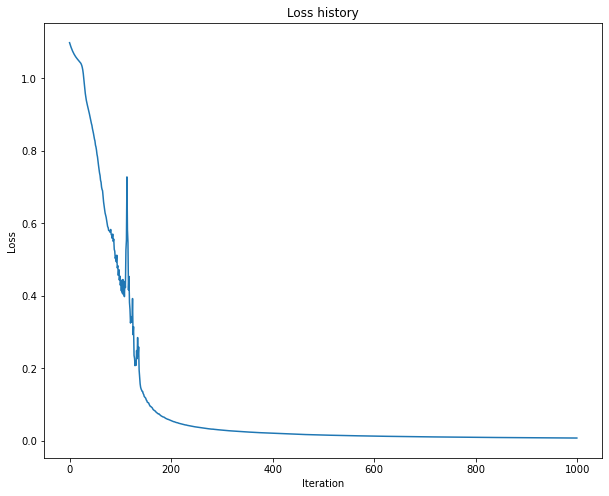

In [9]:
# Plot the training loss curve. The loss in the curve should be decreasing 
plt.plot(epoch_loss)
plt.title("Loss history")
plt.xlabel("Iteration")
plt.ylabel("Loss")
